<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP2/7506R_TP2_GRUPO24_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

  ➢ Torraca Lautaro - 108813

  ➢ Negrotti Gianluca - 108184

  ➢ Marco Tosi - 107237

### > Imports

In [204]:
!pip install scikit-learn scikit-optimize

In [205]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### > Lectura de los datasets

In [206]:

url_train = '/content/train_limpio.csv'
url_test = '/content/test_limpio.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

### > Random Forest

- Division y preprocesamiento de los datos

In [207]:

X = train['review_es']
y = train['sentimiento'].apply(lambda x: 1 if x == 'positiva' else 0)

#Encodeado de los textos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train['sentimiento'])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


- Optimizacion de hiperpametros con BayesSearch

In [208]:
# Definir el modelo y los parámetros para la búsqueda bayesiana
rf = RandomForestClassifier(criterion= 'gini', random_state=42)
search_space = {
    'n_estimators': list(np.arange(10, 20, 500)),
    'max_depth': list(np.arange(3, 10, 25)),
    'min_samples_split': list(np.arange(2, 25, 10)),
    'min_samples_leaf': list(np.arange(1, 10, 25)),
    'ccp_alpha': list(np.arange(0.000065, 0.0001, 0.01))
}

# Búsqueda bayesiana de parámetros
random_forest = BayesSearchCV(rf, search_space, n_iter=10, random_state=42, cv=3)


- Vectorizacion

In [209]:

# Vectorización de los textos
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

- Entrenamiento y prediccion

In [210]:
# Entrenar el modelo
random_forest.fit(X_train_tfidf, y_train)

# Mejores parámetros
print("Mejores parámetros: ", random_forest.best_params_)



Mejores parámetros:  OrderedDict([('ccp_alpha', 6.5e-05), ('max_depth', 3), ('min_samples_leaf', 1), ('min_samples_split', 22), ('n_estimators', 10)])


In [211]:
# Predecir y evaluar
y_pred = random_forest.predict(X_test_tfidf)

# # Decodificar las etiquetas numéricas a categóricas para y_pred
# y_pred_labels = label_encoder.inverse_transform(y_pred)

# # Decodificar las etiquetas numéricas a categóricas para y_test
# y_test_labels = label_encoder.inverse_transform(y_test)

# Métricas de evaluación

# positive_label_index = list(label_encoder.classes_).index('positivo')


- Muestra de la matriz de confusion y metricas

Text(50.722222222222214, 0.5, 'True')

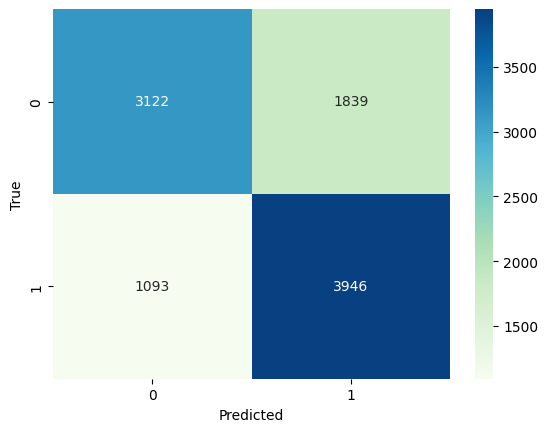

In [212]:
tabla=confusion_matrix(y_test, y_pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [213]:
def mostrar_metricas(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")


In [214]:
mostrar_metricas(y_test, y_pred)

Accuracy: 0.7068
Precision: 0.6821
Recall: 0.7831
F1 Score: 0.7291


- Guardado del predictor con pickle

In [217]:

# Guardar el modelo
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest.best_estimator_, file)


# Descargar los archivos (funciona en Google Colab)
try:
    from google.colab import files
    files.download('random_forest.pkl')

except ImportError:
    print("La función de descarga solo funciona en entornos como Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
test['review_es_clean'] = test['review_es_clean'].astype('category')

test_features = tfidf_vectorizer.transform(test['review_es_clean'])

test_predictionsRF = random_forest.predict(test_features)

output = pd.DataFrame(zip(test["ID"], label_encoder.inverse_transform(test_predictionsRF)),columns = ['ID','sentimiento'])

output.to_csv('prediccion_RF.csv', index=False)

# Descargar el archivo de predicciones (esto funcionará en entornos como Jupyter o Google Colab)
try:
    from google.colab import files
    files.download('prediccion_RF.csv')
except ImportError:
    print("La función de descarga solo funciona en entornos como Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>